In [3]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
fraud_data=pd.read_csv(r'C:\Users\vikra\OneDrive\Desktop\Data scince assignment\Assignment\Random forest\Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud_data.shape

(600, 6)

In [6]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud_data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

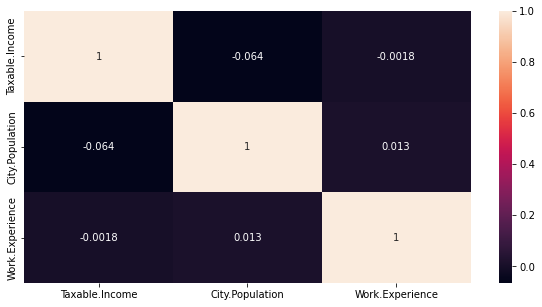

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(fraud_data.corr(),annot=True)

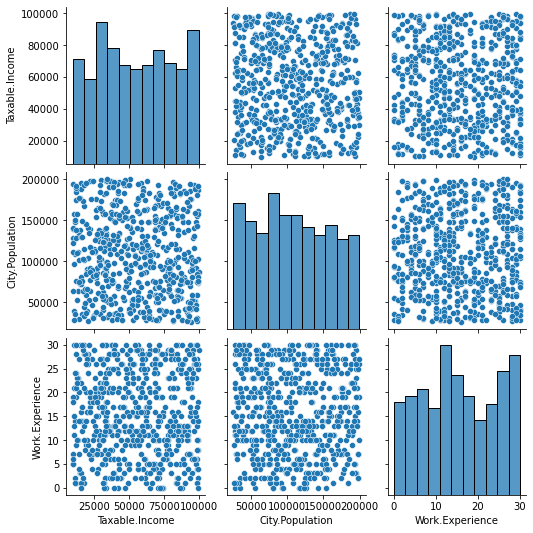

In [10]:
sns.pairplot(fraud_data)

In [11]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(fraud_data[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

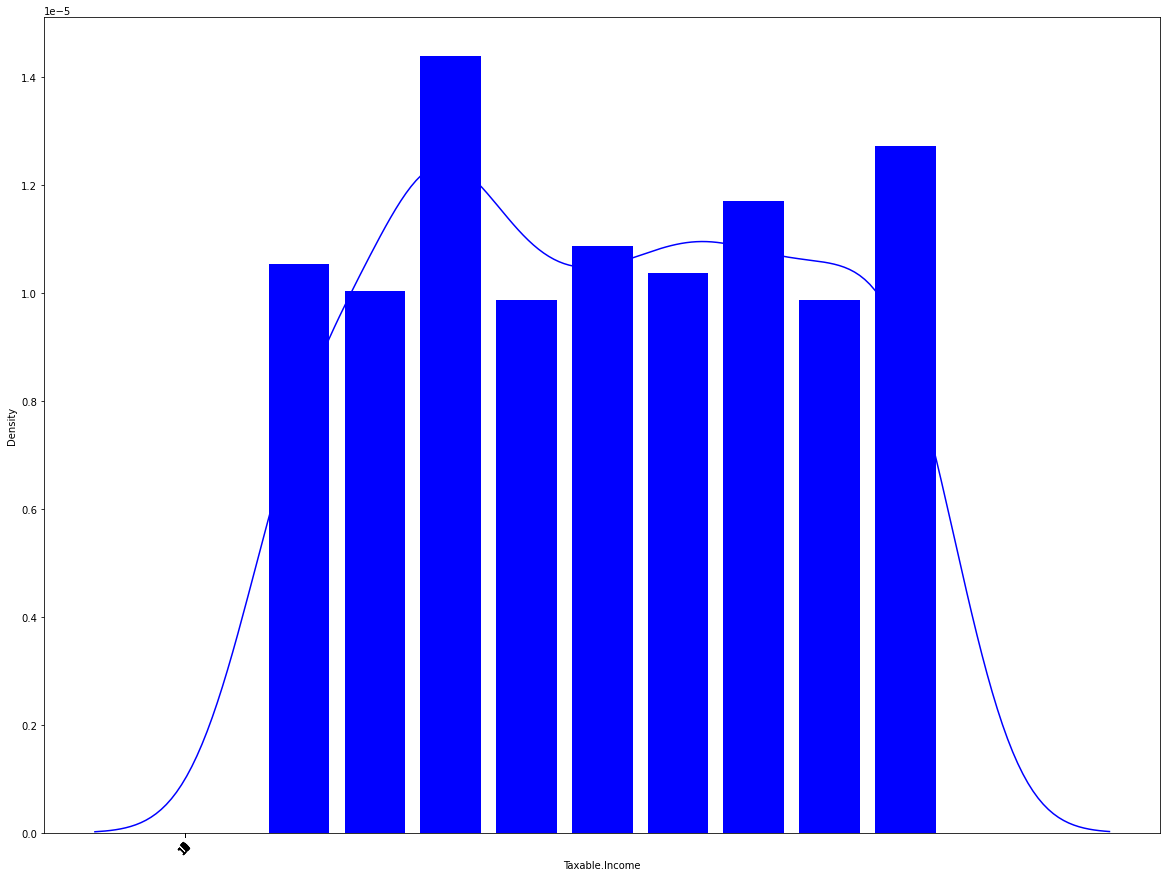

In [12]:
distplot("Taxable.Income")

<AxesSubplot:>

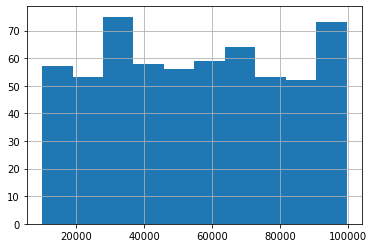

In [15]:
fraud_data['Taxable.Income'].hist()

<AxesSubplot:>

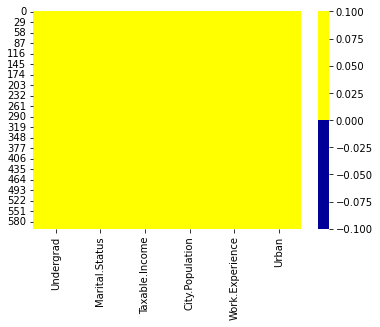

In [19]:
cols = fraud_data.columns
sns.heatmap(fraud_data[cols].isnull(),
            cmap=sns.color_palette(['#000099','#ffff00']))

In [20]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [21]:
# Converting the target variable into Categorical 
fraud_data.loc[fraud_data['Taxable.Income']>=30000,'Tax_inc']="Good"
fraud_data.loc[fraud_data['Taxable.Income']<=30000,'Tax_inc']="risky"
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_inc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [22]:
fraud_data['Tax_inc'].value_counts()

Good     476
risky    124
Name: Tax_inc, dtype: int64

In [23]:
fraud_data.drop(["Taxable.Income"],axis=1,inplace=True)

In [24]:
#Changing the categorical variables 
label_encoder= preprocessing.LabelEncoder()
fraud_data['Tax_inc']=label_encoder.fit_transform(fraud_data['Tax_inc'])
fraud_data['Undergrad']=label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status']=label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban']=label_encoder.fit_transform(fraud_data['Urban'])
fraud_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_inc
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [25]:
fraud_data['Tax_inc'].value_counts()

0    476
1    124
Name: Tax_inc, dtype: int64

In [26]:
y=fraud_data['Tax_inc']
x=fraud_data.iloc[:,0:5]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [29]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 5) (120, 5) (480,) (120,)


In [30]:
model=RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score,classification_report

In [33]:
accuracy_score(y_test,y_pred)

0.725

In [34]:
kfold =KFold(n_splits=10,shuffle =True,random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
result_RF=cross_val_score(model1,x,y, cv =kfold)

In [35]:
result_RF.mean()

0.7416666666666666

In [36]:
result_RF

array([0.68333333, 0.75      , 0.68333333, 0.71666667, 0.7       ,
       0.75      , 0.81666667, 0.75      , 0.76666667, 0.8       ])

In [37]:
# Ensemble Techniques 

In [38]:
#bagging

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
seed = 7
cart = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=seed)
results_bag = cross_val_score(model_bag, x, y, cv=kfold)
print(round(results_bag.mean()*100,2))

73.83


In [41]:
#Boosting

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
seed = 7
model_boost = AdaBoostClassifier(n_estimators=100, random_state=seed)
results_boost = cross_val_score(model_boost, x, y, cv=kfold)
print(round(results_boost.mean()*100,2))

76.67


In [44]:
# stacking ensemble classification

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
estimators = []
model_logistic = LogisticRegression(max_iter=500)
estimators.append(('logistic', model_logistic))
model_DT = DecisionTreeClassifier()
estimators.append(('cart', model_DT))
model_svc = SVC()
estimators.append(('svm', model_svc))

In [47]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
result_stack = cross_val_score(ensemble, x, y, cv=kfold)
print(result_stack.mean())

0.7933333333333333


In [48]:
results={"model":pd.Series(['Random_forest','Bagging','Boosting','Stacking']),
        "Results":pd.Series([result_RF.mean(),results_bag.mean(),results_boost.mean(),result_stack.mean()])}
Result_table=pd.DataFrame(results)

In [49]:
Result_table

,model,Results
0,Random_forest,0.741667
1,Bagging,0.738333
2,Boosting,0.766667
3,Stacking,0.793333


In [50]:
#stacking gives the good result